Capstone Project — The Battle of Neighbourhoods


Introduction

Hands down, food has its own way of getting someone to trip over heels, making them drool, dream and munch. Hands down, food has its own way of getting someone to trip over heels, making them drool, dream and munch. And while some say that their heart beats for food, why not get close to the heart of India, Delhi is like a buffet of some of the best mouth-watering food that can be found anywhere else. Whether it's the narrow streets of 
old Delhi where vendors mix different flavors,the overcrowded bazaars of central and southern Delhi where the aroma of food can pull you in from kilometers away or the posh restaurants around Delhi that boast of their authenticity, there's plenty to catch up with when in Delhi.


Business Problem

New Delhi City has many restaurants, each of which belongs to various categories 
such as Chinese, Italian , French, etc. So we will list and visualize all major parts 
of New Delhi City as part of this project. 



Points to note

*Famous places for chinese food  
*Maximum Chinese Restaurants  
*Least Number of Chinese Restaurants  
*Recommended place to stay if someone prefers Chinese Food  
*Places with reputed restaurants in New Delhi  


Data

For this project we need the following data :  

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.  
-Data source : Zomato kaggel dataset  
    Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city. Nearby places in each locality of new delhi city.  
-Data source : Fousquare API Description : By using this api we will get all the venues in each neighborhood.  
        Description : By using this api we will get all the venues in each neighborhood.

Steps of Approach:

1.Collect the new delhi city data from Zomato kaggel dataset  
2.Using FourSquare API we will find all venues for each neighborhood.  
3.Filter out all venues that are nearby by locality.  
4.Using aggregative rating for each resturant to find the best places.  
5.Visualize the Ranking of neighborhoods using folium library(python)  

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder


CondaValueError: invalid package specification: #--yes



In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

Data Cleaning  
remove the unwanted columns and rows from dataset

In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

MAp for Clusters of Restaurant

In [9]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [10]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

Places with Best Restaurants in New Delhi

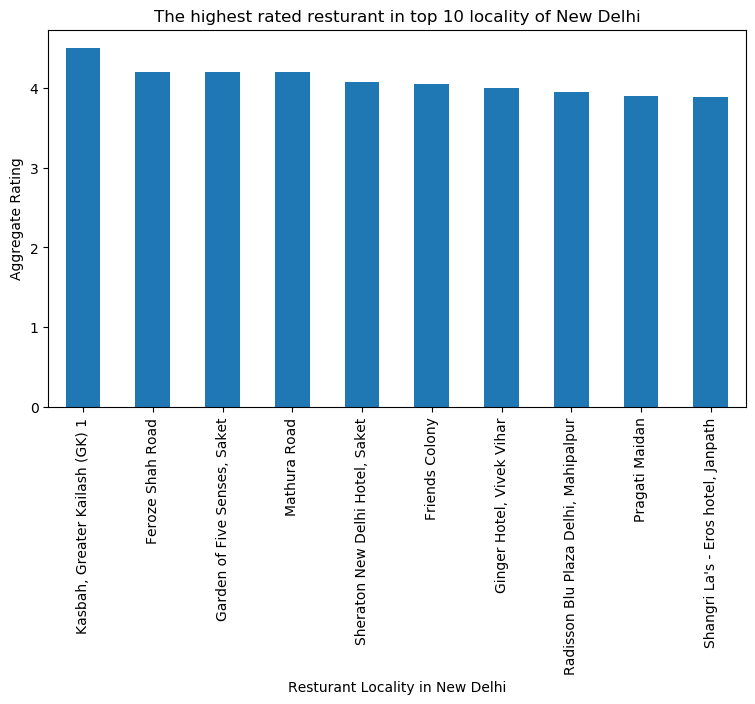

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in Kesbah, Greater Kailash area.

Places with lowest rating in New Delhi

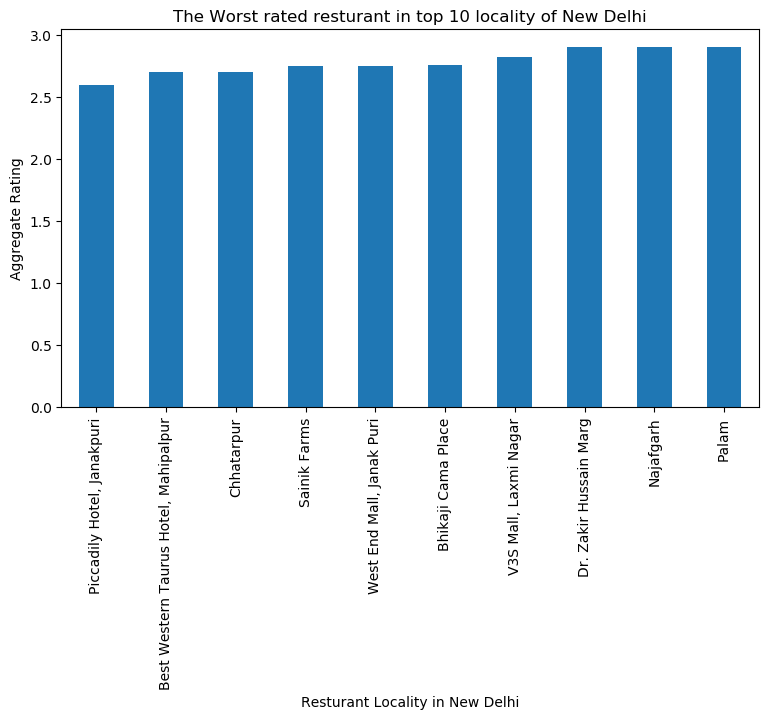

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpuri

Recommended Places in Delhi where one can eat

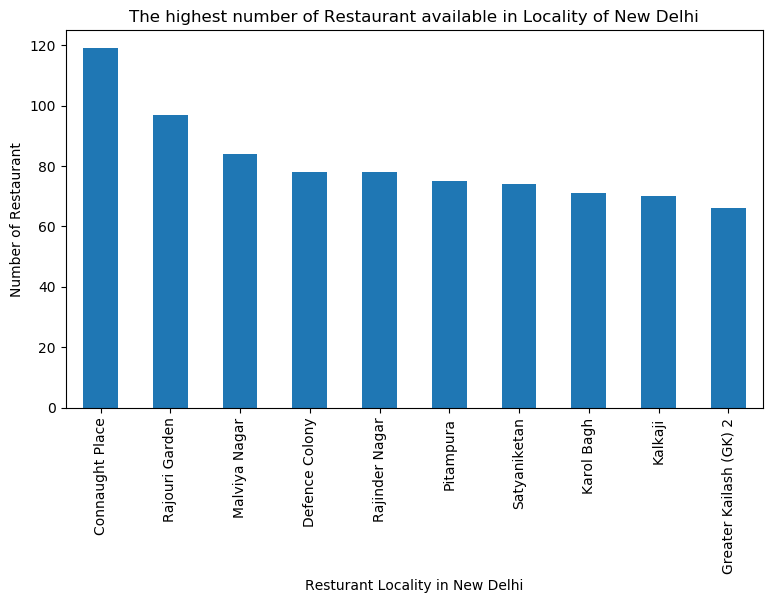

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Connaught Place is the best places for a person to stay 

Lowest number of restaurants in Delhi:

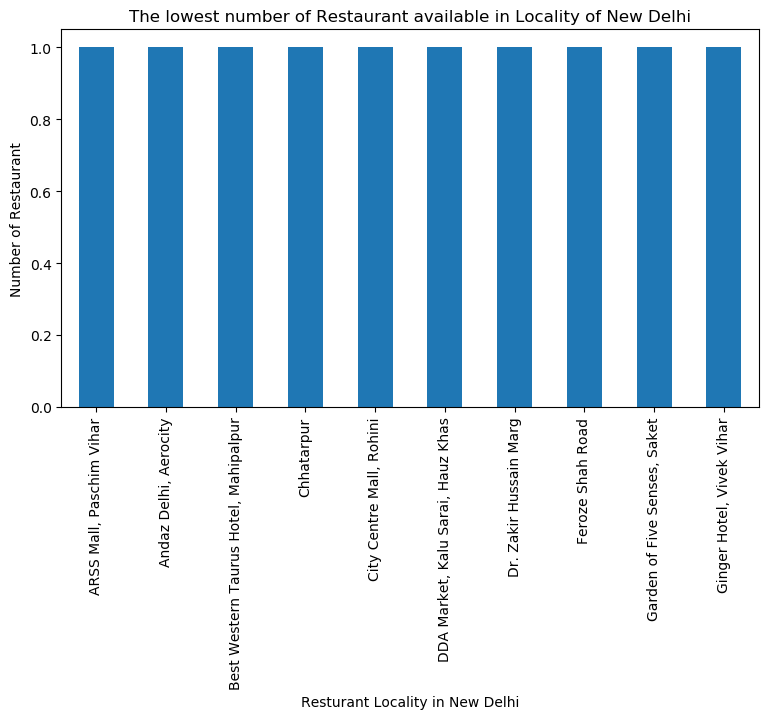

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Famous places for chinese food

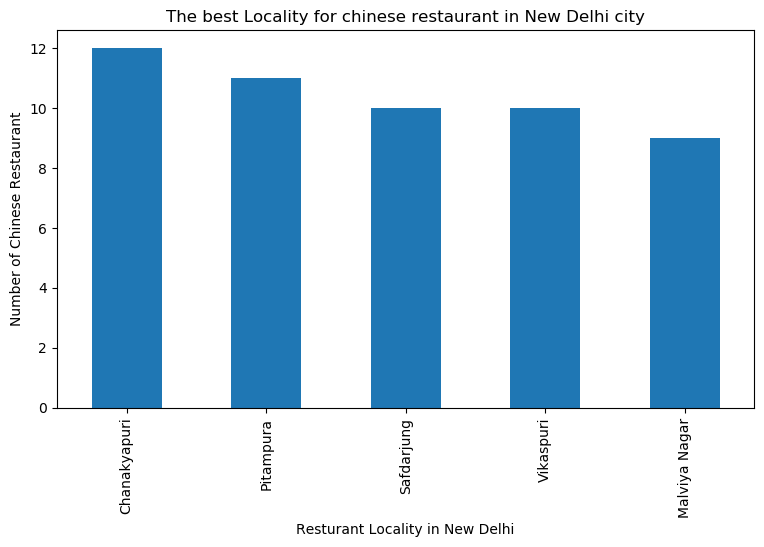

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Chanakyapuri is the best place for Chinese restaurant.

Famous places for chinese food

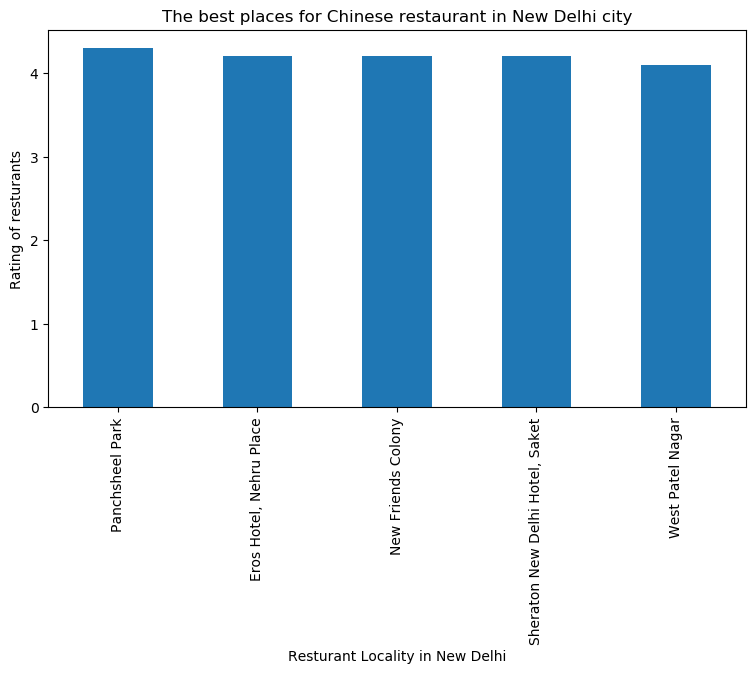

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Panchsheel park is best Chinese resturants.

DATA TRANSFORMATION

Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [19]:
df_final.shape

(240, 8)

Define Foursquare Credentials and Version

In [20]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'JOZEP0RVYOKD4B04G5MFB1EBM2EV1GZRBI1Y0QYRVMALFL22' # Foursquare ID
CLIENT_SECRET = '3NVQFVSCKDYTWS4KENUZAZ1WAQFO2NRHNZUUTRX52AEZST2S' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JOZEP0RVYOKD4B04G5MFB1EBM2EV1GZRBI1Y0QYRVMALFL22
CLIENT_SECRET:3NVQFVSCKDYTWS4KENUZAZ1WAQFO2NRHNZUUTRX52AEZST2S


create a function to repeat the same process to all the Locality in New Delhi

In [21]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

find the venues in all New Delhi Locality

In [22]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [23]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [24]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         8                   8      8   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          33                  33     33   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       33                  33     33   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      8                8   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       33               33   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    33               33   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      8  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       33  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    33  

[239 rows x 6 columns]

In [25]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 214 uniques categories.


In [26]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()



Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 215 columns]

In [27]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
234  West Gate Mall, Rajouri Garden  0.000000           0.000000   
235                West Patel Nagar  0.000000           0.000000   
236           Worldmark 1, Aerocity  0.000000           0.030303   
237                     Yusuf Sarai  0.000000           0.000000   
238        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   
238                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
234        0.000000              0.0          0.000000  ...    0.0   
235        0.000000              0.0          0.000000  ...    0.0   
236        0.000000              0.0          0.000000  ...    0.0   
237        0.000000              0.0          0.000000  ...    0.0   
238        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
234       0.000000                 0.0               0.0   
235       0.000000                 0.0               0.0   
236       0.030303                 0.0               0.0   
237       0.000000                 0.0               0.0   
238       0.030303                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236                            0.0                    0.0         0.0   
237              

In [28]:
New_Delhi_grouped.shape

(239, 215)

In [29]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant  0.22
1                ATM  0.11
2        Pizza Place  0.11
3        Coffee Shop  0.11
4     Sandwich Place  0.11


----Adchini----
               venue  freq
0                Pub  0.25
1  Indian Restaurant  0.25
2               Café  0.25
3   Parsi Restaurant  0.12
4         Restaurant  0.12


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2   Rental Car Location  0.14
3           Coffee Shop  0.14
4        Airport Lounge  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0         Pizza Place  0.25
1    Department Store  0.25
2   Indian Restaurant  0.25
3  Chinese Restaurant  0.25
4                 ATM  0.00


----Aggarwal C

In [30]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted


Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
234  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
235                West Patel Nagar           Pizza Place   
236           Worldmark 1, Aerocity                 Hotel   
237                     Yusuf Sarai     Indian Restaurant   
238        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0                     ATM           Coffee Shop   
1                     Pub                  Café   
2               Multiplex     Indian Restaurant   
3        Airport Terminal           Coffee Shop   
4        Department Store     Indian Restaurant   
..                    ...                   ...   
234           Pizza Place                  Café   
235     Indian Restaurant             Juice Bar   
236            Restaurant       Bed & Breakfast   
237           Coffee Shop     Korean Restaurant   
238            Restaurant             Hotel Bar   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant        Sandwich Place   
1                        Restaurant      Parsi Restaurant   
2                     Shopping Mall                 Hotel   
3               Rental Car Location        Airport Lounge   
4                Chinese Restaurant                  Food   
..                              ...                   ...   
234             American Restaurant           Snack Place   
235                           Hotel                Bakery   
236                       Hotel Bar     Indian Restaurant   
237                             Bar                   Gym   
238               Indian Restaurant           Coffee Shop   

    6th Most Common Venue      7th Most Common Venue   8th Most Common Venue  \
0      Chinese Restaurant                     Market             Pizza Place   
1             Flower Shop                Gaming Cafe  Furniture / Home Store   
2                    Café                Flower Shop  Furniture / Home Store   
3    Fast Food Restaurant              Women's Store              Food Truck   
4                  Garden                Gaming Cafe  Furniture / Home Store   
..                    ...                        ...                     ...   
234             Multiplex  Middle Eastern Restaurant           Shopping Mall   
235                  Food              Garden Center                  Garden   
236           Coffee Shop         Italian Restaurant         Thai Restaurant   
237  Fast Food Restaurant                      Hotel                    Park   
238    Italian Restaurant            Thai Restaurant           Shopping Mall   

    9th Most Common Venue  10th Most Common Venue  
0      Falafel Restaurant              Food Court  
1      Frozen Yogurt Shop     Fried Chicken Joint  
2      Frozen Yogurt Shop     Fried Chicken Joint  
3       French Restaurant     Fried Chicken Joint  
4      Frozen Yogurt Shop     Fried Chicken Joint  
..                    ...                     ...  
234            Hookah Bar                  Garden  
235           Gaming Cafe  Furniture / Home Store  
236    Mughlai Restaurant           Shopping Mall  
237      Asian Restaurant          Ice Cream Shop  
238            Food Court         Bed & Breakfast  

[239 rows x 11 columns]

In [32]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [34]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\Meghna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               1   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               1   
3                         Average           59               2   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1     Indian Restaurant                   Pub                  Café   
2           Pizza Place             Multiplex     Indian Restaurant   
3                 Hotel      Airport Terminal           Coffee Shop   
4           Pizza Place      Department Store     Indian Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant        Sandwich Place    Chinese Restaurant   
1                      Restaurant      Parsi Restaurant           Flower Shop   
2                   Shopping Mall                 Hotel                  Café   
3             Rental Car Location        Airport Lounge  Fast Food Restaurant   
4              Chinese Restaurant                  Food                Garden   

  7th Most Common Venue   8th Most Common Venue 9th Most Common Venue  \
0                Market             Pizza Place    Falafel Restaurant   
1           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
2           Flower Shop  Furniture / Home Store    Frozen Yogurt Shop   
3         Women's Store              Food Truck     French Restaurant   
4           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   

  10th Most Common Venue  
0             Food Court  
1    Fried Chicken Joint  
2    Fried Chicken Joint  
3    Fried Chicken Joint  
4    Fried Chicken Joint

In [35]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
9    28.659870    3.281481                              Average, Good   
21   28.589797    3.085714                        Average, Good, Poor   
59   28.654883    3.053846                              Average, Good   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
162  28.725814    3.050000                                    Average   
180  28.534499    3.000000                        Average, Good, Poor   
228  28.596073    3.052941                              Average, Good   
230  28.658041    3.400000                                    Average   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9           1309               0                  Café          Burger Joint   
21          1617               0    African Restaurant                  Park   
59           262               0          Burger Joint         Women's Store   
86          4011               0                  Café                  Park   
162           50               0                  Café                 Hotel   
180          173               0                  Café                  Park   
228          305               0  Gym / Fitness Center                  Café   
230           19               0          Burger Joint         Burrito Place   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
9           Burrito Place                  Park     Convenience Store   
21                  Trail          Concert Hall                  Café   
59      Food & Drink Shop             Gastropub         Garden Center   
86                    Gym                Bakery         Women's Store   
162         Women's Store                  Food         Garden Center   
180         Women's Store                  Food         Garden Center   
228         Women's Store     Food & Drink Shop         Garden Center   
230                  Park     Convenience Store                  Café   

    6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
9           Women's Store            Food Court                  Garden   
21          Women's Store     Food & Drink Shop           Garden Center   
59                 Garden           Gaming Cafe  Furniture / Home Store   
86             Food Court         Garden Center                  Garden   
162                Garden           Gaming Cafe  Furniture / Home Store   
180                Garden           Gaming Cafe  Furniture / Home Store   
228                Garden           Gaming Cafe  Furniture / Home Store   
230         Women's Store            Food Court                  Garden   

    9th Most Common Venue  10th Most Common Venue  
9             Gaming Cafe  Furniture / Home Store  
21                 Garden             Gaming Cafe  
59     Frozen Yogurt Shop     Fried Chicken Joint  
86            Gaming Cafe  Furniture / Home Store  
162    Frozen Yogurt Shop     Fried Chicken Joint  
180    Frozen Yogurt Shop     Fried Chicken Joint  
228    Frozen Yogurt Shop     Fried Chicken Joint  
230           Gaming Cafe  Furniture / Home Store

In [37]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                   Average, Good          434   
4    28.690020    3.033333                         Average          126   
12   28.641698    3.050000                         Average           17   
..         ...         ...                             ...          ...   
223  28.619954    2.905714                   Average, Poor          242   
231  28.637492    3.062264             Average, Good, Poor         1253   
233  28.695096    3.050000                         Average           86   
235  28.652978    3.500000                            Good          178   
237  28.550257    3.220000                   Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                 1     Indian Restaurant                   ATM   
1                 1     Indian Restaurant                   Pub   
2                 1           Pizza Place             Multiplex   
4                 1           Pizza Place      Department Store   
12                1     Indian Restaurant                 Hotel   
..              ...                   ...                   ...   
223               1                   ATM     Indian Restaurant   
231               1           Pizza Place     Indian Restaurant   
233               1                   NaN                   NaN   
235               1  Fast Food Restaurant           Pizza Place   
237               1                 Hotel            Restaurant   

    3rd Most Common Venue           4th Most Common Venue  \
0             Coffee Shop  Multicuisine Indian Restaurant   
1                    Café                      Restaurant   
2       Indian Restaurant                   Shopping Mall   
4       Indian Restaurant              Chinese Restaurant   
12          Movie Theater                      Theme Park   
..                    ...                             ...   
223                  Food                       Gastropub   
231           Beer Garden            Fast Food Restaurant   
233                   NaN                             NaN   
235                  Café             American Restaurant   
237       Bed & Breakfast                       Hotel Bar   

    5th Most Common Venue 6th Most Common Venue      7th Most Common Venue  \
0          Sandwich Place    Chinese Restaurant                     Market   
1        Parsi Restaurant           Flower Shop                Gaming Cafe   
2                   Hotel                  Café                Flower Shop   
4                    Food                Garden                Gaming Cafe   
12                 Hostel            Campground              Women's Store   
..                    ...                   ...                        ...   
223         Garden Center                Garden                Gaming Cafe   
231         Women's Store     Food & Drink Shop              Garden Center   
233                   NaN                   NaN                        NaN   
235           Snack Place             Multiplex  Middle Eastern Restaurant   
237     Indian Restaurant           Coffee Shop         Italian Restaurant   

      8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
0               Pizza Place    Falafel Restaurant              Food Court  
1    Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint  
2    Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint  
4    Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint  
12               Food Court            Food Truck     Fried Chicken Joint  
..                      ...                   ...                     ...  
223  Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint  
231                  Garden

In [38]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
207  28.625445    3.600000             Average, Good, Very Good          843   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
220  28.523519    3.700000                                 Good          281   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 2                 Hotel          Airport Terminal   
10                2                 Hotel         Indian Restaurant   
19                2                 Hotel        Italian Restaurant   
25                2            Donut Shop       Japanese Restaurant   
35                2                 Hotel               Pizza Place   
56                2                 Hotel          Sculpture Garden   
60                2                 Hotel         Indian Restaurant   
69                2                 Hotel                Restaurant   
70                2                 Hotel                Restaurant   
72                2                Garden        Light Rail Station   
74                2                 Hotel         Indian Restaurant   
83                2                 Hotel                Restaurant   
111               2                 Hotel              Cocktail Bar   
112               2                 Hotel                Restaurant   
119               2                 Hotel                     Plaza   
120               2    Italian Restaurant         Indian Restaurant   
128               2                  Food   Health & Beauty Service   
146               2            Restaurant                     Hotel   
149               2  

In [39]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
22   28.654105    3.085714                   Average           80   
57   28.699837    3.376471  Average, Good, Very Good         2460   
104  28.656263    3.097619             Average, Good          965   
160  28.712975    3.066667                   Average          121   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
22                3           Pizza Place         Women's Store   
57                3           Pizza Place            Food Truck   
104               3           Pizza Place     Accessories Store   
160               3           Pizza Place     Indian Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22                   Food         Garden Center                Garden   
57          Women's Store                  Food         Garden Center   
104         Women's Store                  Food         Garden Center   
160             Multiplex         Women's Store                  Food   

    6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
22            Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
57                 Garden             Gaming Cafe  Furniture / Home Store   
104                Garden             Gaming Cafe  Furniture / Home Store   
160                Garden             Gaming Cafe  Furniture / Home Store   

    9th Most Common Venue 10th Most Common Venue  
22    Fried Chicken Joint      French Restaurant  
57     Frozen Yogurt Shop    Fried Chicken Joint  
104    Frozen Yogurt Shop    Fried Chicken Joint  
160    Frozen Yogurt Shop    Fried Chicken Joint

In [40]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
11   28.562580    3.750000             Average, Good, Very Good          875   
..         ...         ...                                  ...          ...   
226  28.525054    3.322222                        Average, Good         1940   
227  28.559704    3.278261             Average, Good, Very Good         1043   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
232  28.667344    3.077273                  Average, Good, Poor          939   
234  28.630044    2.750000                        Average, Poor          238   

     Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
5                 4  Gym / Fitness Center            Pizza Place   
6                 4                Market             Steakhouse   
7                 4           Coffee Shop     Italian Restaurant   
8                 4               Stadium                   Café   
11                4      Department Store  Performing Arts Venue   
..              ...                   ...                    ...   
226               4    Chinese Restaurant            Pizza Place   
227               4                  Café            Coffee Shop   
229               4                  Café     Chinese Restaurant   
232               4             Juice Bar        Bed & Breakfast   
234               4     Indian Restaurant     Chinese Restaurant   

             3rd Most Common Venue 4th Most Common Venue  \
5                    Shopping Mall        Ice Cream Shop   
6          New American Restaurant           Coffee Shop   
7                 Asian Restaurant  Fast Food Restaurant   
8                     Dessert Shop         Metro Station   
11                     Karaoke Bar  Fast Food Restaurant   
..                             ...                   ...   
226  Vegetarian / Vegan Restaurant                   Spa   
227             Chinese Restaurant            Restaurant   
229             Italian Restaurant             Pet Store   
232             Athletics & Sports         Women's Store   
234                    Pizza Place    Light Rail Station   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5               Multiplex           Bus Station        Sandwich Place   
6       Food & Drink Shop                  Food                Garden   
7          Clothing Store                  Café         Shopping Mall   
8             Golf Course           Music Venue                 Hotel   
11   Gym / Fitness Center           Snack Place         Women's Store   
..                    ...                   ...                   ...   
226                  Bank  Fast Food Restaurant        Sandwich Place   
227  Fast Food Restaurant          Gourmet Shop         Movie Theater   
229  Fast Food Restaurant   American Restaurant                Bakery   
232            Food Court             Gastropub         Garden Center   
234           Music Store        Sandwich Place            Restaurant   

    8th Most Common Venue   9th Most Common Venue  10th Most Common Venue  
5    Fast Food Restaurant             Salad Place              Restaurant  
6             Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop  
7      Chinese Restaurant       Indian Restaurant          Sandwich Place  
8    Other Great Outdoors             Coffee Shop             Gaming Cafe  
11      Food & Drink Shop                  Garden             Gaming Cafe  
..                    ...                     ...                     ...  
226                  Café           Women's Store             Gaming Cafe  
227     Food & Drink Shop  

Conclusion  
*Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.  
*Pancsheel park, Nehru place have the best Chinese Resturant.  
*Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.  
*Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.  

####Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels and nightclub. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and pizza.
​